In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

# Load data file
bank_data = pd.read_csv("C:/Users/hp/Desktop/Data Science Mock Test/Data Science Mock Test 2/bank_train.csv")
bank.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,43,197,2,999,0,1.4,93.918,-42.7,4.961,5228.1,...,1,1,1,0,0,2,0,3,3,1
1,41,121,5,999,0,-1.8,92.893,-46.2,1.244,5099.1,...,0,1,6,1,2,0,0,6,1,1
2,56,106,1,999,0,1.4,93.444,-36.1,4.965,5228.1,...,11,1,0,0,2,0,0,1,1,1
3,49,59,2,999,0,1.4,93.918,-42.7,4.963,5228.1,...,0,1,3,0,2,0,0,3,0,1
4,26,159,2,999,0,1.4,93.918,-42.7,4.960,5228.1,...,1,1,2,0,2,0,0,3,1,1


In [179]:
# Check if the data set contains any null values - Nothing found!
bank[bank.isnull().any(axis=1)].count()

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
purchased         0
id                0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
poutcome          0
dtype: int64

In [180]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,3295.000000,3295.000000,3295.000000,3295.000000,3295.000000,3295.000000,3295.000000,3295.000000,3295.000000,3295.000000,...,3295.000000,3295.000000,3295.000000,3295.000000,3295.000000,3295.000000,3295.000000,3295.000000,3295.000000,3295.000000
mean,40.046434,253.648558,2.572382,960.723824,0.188771,0.087344,93.580564,-40.570258,3.624735,5166.906131,...,3.773293,1.179970,3.765402,0.197572,1.095599,0.355083,0.358725,4.287102,2.010015,0.925948
std,10.278896,252.062484,2.643254,191.200469,0.546720,1.559786,0.579502,4.587050,1.728619,73.016947,...,3.587388,0.603642,2.152903,0.398228,0.982680,0.747502,0.479699,2.298227,1.383249,0.370403
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,101.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,...,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000
50%,38.000000,178.000000,2.000000,999.000000,0.000000,1.100000,93.798000,-41.800000,4.857000,5191.000000,...,2.000000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,4.000000,2.000000,1.000000
75%,47.000000,315.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,...,7.000000,2.000000,6.000000,0.000000,2.000000,0.000000,1.000000,6.000000,3.000000,1.000000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,4.970000,5228.100000,...,11.000000,3.000000,7.000000,1.000000,2.000000,2.000000,1.000000,9.000000,4.000000,2.000000


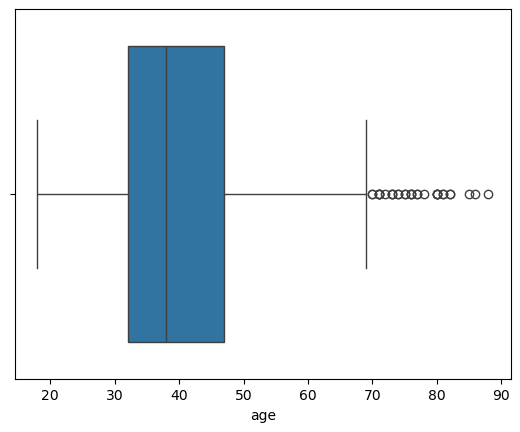

In [181]:
# Boxplot for 'age'
g = sns.boxplot(x=bank["age"])

In [ ]:
# Distribution of Age
sns.displot(bank.age, bins=100)

In [ ]:
# Boxplot for 'duration'
g = sns.boxplot(x=bank["duration"])

In [ ]:
sns.displot(bank.duration, bins=100)

In [ ]:
print(bank_data.head())

In [ ]:
## Explore People who made a deposit Vs Job category
jobs = ['management','blue-collar','technician','admin.','services','retired','self-employed','student',\
        'unemployed','entrepreneur','housemaid','unknown']

for j in jobs:
    print("{:15} : {:5}". format(j, len(bank_data[(bank_data == "yes") & (bank_data.job ==j)])))

In [ ]:
#Different types of job categories and their counts
bank_data.job.value_counts()

In [ ]:
# Combine similar jobs into categiroes
bank_data['job'] = bank_data['job'].replace(['management', 'admin.'], 'white-collar')
bank_data['job'] = bank_data['job'].replace(['services','housemaid'], 'pink-collar')
bank_data['job'] = bank_data['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')

In [ ]:
bank_data.poutcome.value_counts()

In [ ]:
# Combine 'unknown' and 'other' as 'other' isn't really match with either 'success' or 'failure'
bank_data['poutcome'] = bank_data['poutcome'].replace(['other'] , 'unknown')
bank_data.poutcome.value_counts()

In [ ]:
# Drop 'contact', as every participant has been contacted. 
bank_data.drop('contact', axis=1, inplace=True)

In [ ]:
# values for "default" : yes/no
bank_data["default"]
bank_data['default_cat'] = bank_data['default'].map( {'yes':1, 'no':0} )
bank_data.drop('default', axis=1,inplace = True)

In [ ]:
# values for "housing" : yes/no
bank_data["housing_cat"]=bank_data['housing'].map({'yes':1, 'no':0})
bank_data.drop('housing', axis=1,inplace = True)

In [ ]:
# values for "loan" : yes/no
bank_data["loan_cat"] = bank_data['loan'].map({'yes':1, 'no':0})
bank_data.drop('loan', axis=1, inplace=True)print(bank_data.columns)

In [ ]:
print(bank_data.columns)

In [ ]:
if 'month' in bank_data.columns:
    bank_data.drop('month', axis=1, inplace=True)
if 'day_of_week' in bank_data.columns:
    bank_data.drop('day_of_week', axis=1, inplace=True)

In [ ]:
print(bank_data.columns)

In [ ]:
# pdays: number of days that passed by after the client was last contacted from a previous campaign
#       -1 means client was not previously contacted

print("Customers that have not been contacted before:", len(bank_data[bank_data.pdays==-1]))
print("Maximum values on padys    :", bank_data['pdays'].max())

In [ ]:
# Map padys=-1 into a large value (10000 is used) to indicate that it is so far in the past that it has no effect
bank_data.loc[bank_data['pdays'] == -1, 'pdays'] = 10000

In [ ]:
# Create a new column: recent_pdays 
bank_data['recent_pdays'] = np.where(bank_data['pdays'], 1/bank_data.pdays, 1/bank_data.pdays)

# Drop 'pdays'
bank_data.drop('pdays', axis=1, inplace = True)

In [ ]:
bank_data.tail()

In [ ]:
# Convert categorical variables to dummies
bank_with_dummies = pd.get_dummies(data=bank_data, columns = ['job', 'marital', 'education', 'poutcome'], 
                                   prefix = ['job', 'marital', 'education', 'poutcome'])
bank_with_dummies.head()

In [ ]:
bank_with_dummies.shape

In [ ]:
bank_with_dummies.describe()

In [ ]:
print(bank_with_dummies.columns)

In [ ]:
bank_data.plot(kind='hist', x='poutcome', y='duration')

In [ ]:
# People who sign up to a term deposite
bank_with_dummies[bank_data == 1].describe()

In [ ]:
len(bank_with_dummies[(bank_data == 1) & (bank_with_dummies.loan_cat) & (bank_with_dummies.housing_cat)])

In [ ]:
len(bank_with_dummies[(bank_data == 1) & (bank_with_dummies.default_cat ==1)])

In [ ]:
# Bar chart of "previous outcome" Vs "call duration"

plt.figure(figsize = (10,6))
sns.barplot(x='poutcome', y = 'duration', data = bank_data)

In [ ]:
# make a copy
bankcl = bank_with_dummies

In [ ]:
# The Correltion matrix
corr = bankcl.corr()
corr